In [3]:
import numpy as np
import pandas as pd
import os

import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE/MPRA_exp')

from MPRA_predict.utils import *

In [3]:
df = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k.csv')

In [4]:
BSSIDs = ['BSS00558', 'BSS00762', 'BSS00007', 'BSS00492', 'BSS01562']
cell_types = ['HepG2', 'K562', 'A549', 'HCT116', 'SKNSH']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'H3K9ac', 'H3K4me2', 'CTCF']

In [5]:
import pyBigWig

def get_pval_mean_values(df, bw_file):
    bw_mean_values = []
    bw_reader = pyBigWig.open(bw_file)
    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        chr, pos = row['chr'], row['pos']
        start, end = pos - 100, pos + 100
        try:
            values = bw_reader.values(chr, start, end)
            bw_mean_values.append(np.mean(values))
        except RuntimeError as e:
            bw_mean_values.append(np.nan)
            pass
    bw_reader.close()
    bw_mean_values = np.array(bw_mean_values)
    return bw_mean_values



def find_files_with_string(folder_path, search_string):
    matching_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if search_string in file:
                matching_files.append(os.path.join(root, file))
    return matching_files

In [21]:
# folder_path = "../../data/EpiMap/raw_final"
# search_string = f"DNase_BSS00558"
# matching_files = find_files_with_string(folder_path, search_string)
# matching_files

In [27]:
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        BSSID = BSSIDs[i]
        bw_files = find_files_with_string("../../data/EpiMap/raw_final", f'{assay}_{BSSID}')

        if len(bw_files) == 1:
            bw_file = bw_files[0]
            print(bw_file)
            bw_mean_values = get_pval_mean_values(df, bw_file)
            df[f'{cell_type}_{assay}_pval'] = bw_mean_values

        else:
            print(f"Error: {cell_type} {assay} {BSSID} has {len(bw_files)} bw files: {bw_files}")
            df[f'{cell_type}_{assay}_pval'] = np.nan

../../data/EpiMap/raw_final/FINAL_DNase-seq_BSS00558.sub_VS_Uniform_BKG_CONTROL_36_50000000.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27113.02it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me1_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27766.06it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me3_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 28031.10it/s]


../../data/EpiMap/raw_final/FINAL_H3K9me3_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:09<00:00, 28171.39it/s]


../../data/EpiMap/raw_final/FINAL_H3K27me3_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27392.93it/s]


../../data/EpiMap/raw_final/FINAL_H3K27ac_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:09<00:00, 28526.11it/s]


../../data/EpiMap/raw_final/FINAL_H3K36me3_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27407.96it/s]


../../data/EpiMap/raw_final/FINAL_H3K9ac_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 28074.64it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me2_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:09<00:00, 28135.75it/s]


../../data/EpiMap/raw_final/FINAL_CTCF_BSS00558.sub_VS_FINAL_WCE_BSS00558.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27614.11it/s]


../../data/EpiMap/raw_final/FINAL_DNase-seq_BSS00762.sub_VS_Uniform_BKG_CONTROL_36_50000000.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27225.75it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me1_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27720.59it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me3_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:09<00:00, 28175.76it/s]


../../data/EpiMap/raw_final/FINAL_H3K9me3_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27640.30it/s]


../../data/EpiMap/raw_final/FINAL_H3K27me3_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27667.49it/s]


../../data/EpiMap/raw_final/FINAL_H3K27ac_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:09<00:00, 28411.08it/s]


../../data/EpiMap/raw_final/FINAL_H3K36me3_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27509.59it/s]


../../data/EpiMap/raw_final/FINAL_H3K9ac_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27703.87it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me2_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:09<00:00, 28559.04it/s]


../../data/EpiMap/raw_final/FINAL_CTCF_BSS00762.sub_VS_FINAL_WCE_BSS00762.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27708.20it/s]


../../data/EpiMap/raw_final/FINAL_DNase-seq_BSS00007.sub_VS_Uniform_BKG_CONTROL_36_50000000.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27040.28it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me1_BSS00007.sub_VS_FINAL_WCE_BSS00007.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27589.77it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me3_BSS00007.sub_VS_FINAL_WCE_BSS00007.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27888.49it/s]


../../data/EpiMap/raw_final/FINAL_H3K9me3_BSS00007.sub_VS_FINAL_WCE_BSS00007.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27679.06it/s]


Error: A549 H3K27me3 BSS00007 has 0 bw files: []
../../data/EpiMap/raw_final/FINAL_H3K27ac_BSS00007.sub_VS_FINAL_WCE_BSS00007.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27719.40it/s]


Error: A549 H3K36me3 BSS00007 has 0 bw files: []
Error: A549 H3K9ac BSS00007 has 0 bw files: []
../../data/EpiMap/raw_final/FINAL_H3K4me2_BSS00007.sub_VS_FINAL_WCE_BSS00007.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27948.97it/s]


../../data/EpiMap/raw_final/FINAL_CTCF_BSS00007.sub_VS_FINAL_WCE_BSS00007.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27463.44it/s]


../../data/EpiMap/raw_final/FINAL_DNase-seq_BSS00492.sub_VS_Uniform_BKG_CONTROL_36_50000000.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27158.35it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me1_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27376.92it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me3_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27811.97it/s]


../../data/EpiMap/raw_final/FINAL_H3K9me3_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27627.95it/s]


../../data/EpiMap/raw_final/FINAL_H3K27me3_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27519.99it/s]


../../data/EpiMap/raw_final/FINAL_H3K27ac_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27456.10it/s]


../../data/EpiMap/raw_final/FINAL_H3K36me3_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27102.32it/s]


../../data/EpiMap/raw_final/FINAL_H3K9ac_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27496.65it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me2_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27668.41it/s]


../../data/EpiMap/raw_final/FINAL_CTCF_BSS00492.sub_VS_FINAL_WCE_BSS00492.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27263.35it/s]


../../data/EpiMap/raw_final/FINAL_DNase-seq_BSS01562.sub_VS_Uniform_BKG_CONTROL_36_50000000.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:09<00:00, 29744.93it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me1_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27197.00it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me3_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27667.97it/s]


../../data/EpiMap/raw_final/FINAL_H3K9me3_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27402.93it/s]


../../data/EpiMap/raw_final/FINAL_H3K27me3_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27231.66it/s]


../../data/EpiMap/raw_final/FINAL_H3K27ac_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27588.64it/s]


../../data/EpiMap/raw_final/FINAL_H3K36me3_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27067.70it/s]


../../data/EpiMap/raw_final/FINAL_H3K9ac_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27206.43it/s]


../../data/EpiMap/raw_final/FINAL_H3K4me2_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27250.11it/s]


../../data/EpiMap/raw_final/FINAL_CTCF_BSS01562.sub_VS_FINAL_WCE_BSS01562.pval.signal.bedgraph.gz.bigWig


100%|██████████| 281327/281327 [00:10<00:00, 27285.87it/s]


In [28]:
df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,SKNSH_DNase-seq_bw,SKNSH_H3K4me1_bw,SKNSH_H3K4me3_bw,SKNSH_H3K9me3_bw,SKNSH_H3K27me3_bw,SKNSH_H3K27ac_bw,SKNSH_H3K36me3_bw,SKNSH_H3K9ac_bw,SKNSH_H3K4me2_bw,SKNSH_CTCF_bw
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,4.1797,0.22000,0.19,0.18,0.160,0.16,0.2,0.14,0.13,0.25
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,3.5942,0.22000,0.19,0.18,0.160,0.16,0.2,0.14,0.13,0.25
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,3.8800,0.22000,0.19,0.18,0.160,0.16,0.2,0.14,0.13,0.25
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,3.9540,0.31175,0.19,0.18,0.232,0.16,0.2,0.14,0.13,0.25
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,4.1800,0.22000,0.19,0.18,0.160,0.16,0.2,0.14,0.13,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,0.0000,0.00000,0.00,0.00,0.000,0.00,0.0,0.00,0.00,0.00
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.0000,0.00000,0.00,0.00,0.000,0.00,0.0,0.00,0.00,0.00
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,0.0000,0.00000,0.00,0.00,0.000,0.00,0.0,0.00,0.00,0.00
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,0.0000,0.00000,0.00,0.00,0.000,0.00,0.0,0.00,0.00,0.00


In [2]:
df.to_csv('../../data/SirajMPRA/SirajMPRA_ref_pval.csv', index=False)

NameError: name 'df' is not defined

In [6]:
df_pval = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/SirajMPRA/SirajMPRA_281k_pval.csv')
df_pval

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,SKNSH_DNase_pval,SKNSH_H3K4me1_pval,SKNSH_H3K4me3_pval,SKNSH_H3K9me3_pval,SKNSH_H3K27me3_pval,SKNSH_H3K27ac_pval,SKNSH_H3K36me3_pval,SKNSH_H3K9ac_pval,SKNSH_H3K4me2_pval,SKNSH_CTCF_pval
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,4.1797,0.22000,0.19,0.18,0.160,0.16,0.2,0.14,0.13,0.25
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,3.5942,0.22000,0.19,0.18,0.160,0.16,0.2,0.14,0.13,0.25
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,3.8800,0.22000,0.19,0.18,0.160,0.16,0.2,0.14,0.13,0.25
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,3.9540,0.31175,0.19,0.18,0.232,0.16,0.2,0.14,0.13,0.25
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,4.1800,0.22000,0.19,0.18,0.160,0.16,0.2,0.14,0.13,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,0.0000,0.00000,0.00,0.00,0.000,0.00,0.0,0.00,0.00,0.00
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.0000,0.00000,0.00,0.00,0.000,0.00,0.0,0.00,0.00,0.00
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,0.0000,0.00000,0.00,0.00,0.000,0.00,0.0,0.00,0.00,0.00
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,0.0000,0.00000,0.00,0.00,0.000,0.00,0.0,0.00,0.00,0.00


In [7]:
df_pred = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_pred.csv')
df_pred

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit,flag
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789,True
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042,True
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061,True
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-9.422236,-7.347300,-8.694691,-9.359782,-5.428939,-6.522037,-9.115440,-11.068689,-9.575661,True
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-8.141296,-6.796749,-8.496226,-8.733803,-5.545477,-6.327884,-9.130206,-9.962906,-8.654516,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-6.511399,-6.431361,-7.430185,-8.173793,-5.671370,-6.129188,-8.043088,-9.617792,-7.009111,True
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.056848,-0.772791,-4.967724,-5.641770,-6.566808,-6.260857,-6.482600,-8.868452,-0.263586,True
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-5.489334,-4.034711,-4.979386,-6.015636,-6.284647,-6.169166,-6.730436,-8.404432,-6.365997,True
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767,True


In [8]:
df = pd.concat([df_pval, df_pred], axis=1)
df = df.loc[:, ~df.columns.duplicated()]
df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit,flag
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789,True
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042,True
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061,True
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-9.422236,-7.347300,-8.694691,-9.359782,-5.428939,-6.522037,-9.115440,-11.068689,-9.575661,True
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-8.141296,-6.796749,-8.496226,-8.733803,-5.545477,-6.327884,-9.130206,-9.962906,-8.654516,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-6.511399,-6.431361,-7.430185,-8.173793,-5.671370,-6.129188,-8.043088,-9.617792,-7.009111,True
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.056848,-0.772791,-4.967724,-5.641770,-6.566808,-6.260857,-6.482600,-8.868452,-0.263586,True
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-5.489334,-4.034711,-4.979386,-6.015636,-6.284647,-6.169166,-6.730436,-8.404432,-6.365997,True
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767,True


In [9]:
print(df.columns.tolist())

['seq', 'A549', 'HepG2', 'K562', 'SKNSH', 'HCT116', 'is_ref', 'chr', 'pos', 'ref', 'alt', 'HepG2_DNase_pval', 'HepG2_H3K4me1_pval', 'HepG2_H3K4me3_pval', 'HepG2_H3K9me3_pval', 'HepG2_H3K27me3_pval', 'HepG2_H3K27ac_pval', 'HepG2_H3K36me3_pval', 'HepG2_H3K9ac_pval', 'HepG2_H3K4me2_pval', 'HepG2_CTCF_pval', 'K562_DNase_pval', 'K562_H3K4me1_pval', 'K562_H3K4me3_pval', 'K562_H3K9me3_pval', 'K562_H3K27me3_pval', 'K562_H3K27ac_pval', 'K562_H3K36me3_pval', 'K562_H3K9ac_pval', 'K562_H3K4me2_pval', 'K562_CTCF_pval', 'A549_DNase_pval', 'A549_H3K4me1_pval', 'A549_H3K4me3_pval', 'A549_H3K9me3_pval', 'A549_H3K27me3_pval', 'A549_H3K27ac_pval', 'A549_H3K36me3_pval', 'A549_H3K9ac_pval', 'A549_H3K4me2_pval', 'A549_CTCF_pval', 'HCT116_DNase_pval', 'HCT116_H3K4me1_pval', 'HCT116_H3K4me3_pval', 'HCT116_H3K9me3_pval', 'HCT116_H3K27me3_pval', 'HCT116_H3K27ac_pval', 'HCT116_H3K36me3_pval', 'HCT116_H3K9ac_pval', 'HCT116_H3K4me2_pval', 'HCT116_CTCF_pval', 'SKNSH_DNase_pval', 'SKNSH_H3K4me1_pval', 'SKNSH_H3K4me3

(0.0, 10.0)

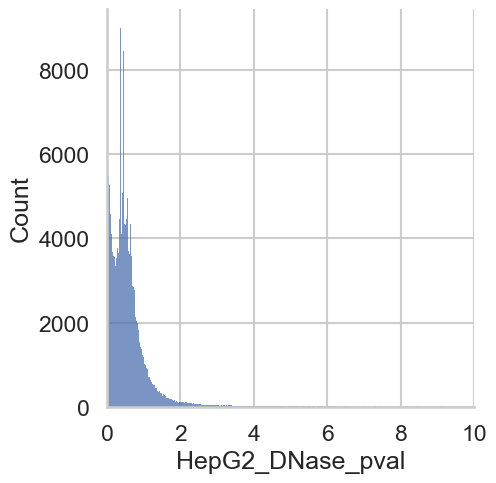

In [11]:
x = df['HepG2_DNase_pval']
sns.displot(x)
plt.xlim(0,10)

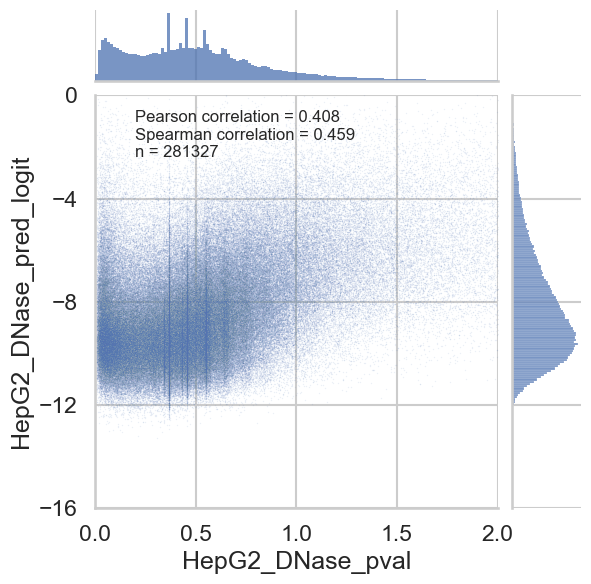

In [16]:
x = df['HepG2_DNase_pval']
y = df['HepG2_DNase_pred_logit']

# mask = x > 0.5
# x = x[mask]
# y = y[mask]

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_pval')
plt.ylabel('HepG2_DNase_pred_logit')
plt.xlim(0, 2)
plt.ylim(-16, 0)
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(-16, 0.1, 4))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )

plt.savefig('figures/scatter/HepG2_DNase_pval_vs_HepG2_DNase_pred_logit.png', dpi=200)
plt.show()

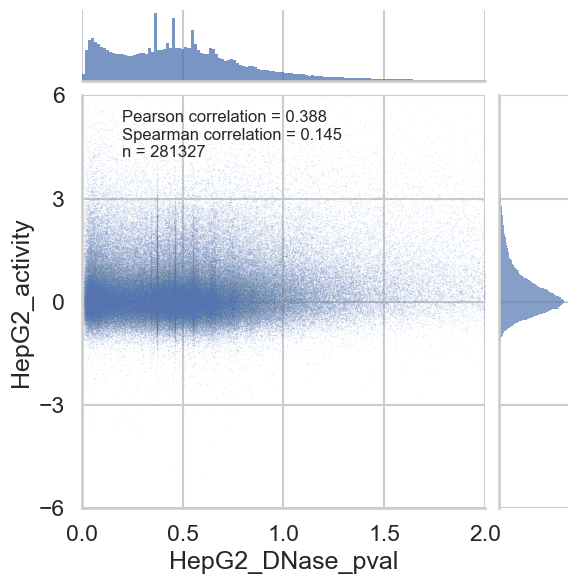

In [17]:
x = df['HepG2_DNase_pval']
y = df['HepG2']

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_pval')
plt.ylabel('HepG2_activity')
plt.xlim(0, 2)
plt.ylim(-6, 6)
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(-6, 6.1, 3))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )
plt.savefig('figures/scatter/HepG2_DNase_pval_vs_HepG2_activity.png', dpi=200)
plt.show()

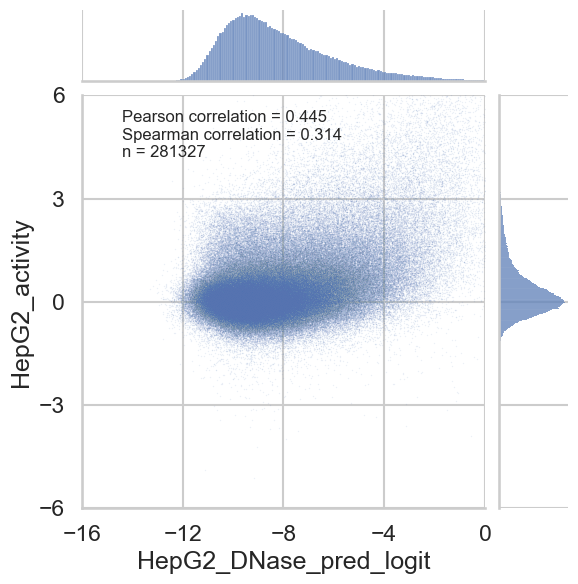

In [18]:
x = df['HepG2_DNase_pred_logit']
y = df['HepG2']

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_pred_logit')
plt.ylabel('HepG2_activity')
plt.xlim(-16, 0)
plt.ylim(-6, 6)
plt.xticks(np.arange(-16, 0.1, 4))
plt.yticks(np.arange(-6, 6.1, 3))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )
plt.savefig('figures/scatter/HepG2_DNase_pred_logit_vs_HepG2_activity.png', dpi=200)
plt.show()

In [ ]:
# x = np.log2(df['HepG2_DNase_pred_logit'] + 0.1)
# y = df['HepG2']

# r1 = pearson(x=x, y=y)
# r2 = spearman(x=x, y=y)

# g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
# plt.xlabel('HepG2_DNase_pred_logit')
# plt.ylabel('HepG2_activity')
# plt.xlim(-16, 0)
# plt.ylim(-6, 6)
# plt.xticks(np.arange(-16, 0.1, 4))
# plt.yticks(np.arange(-6, 6.1, 3))
# plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
#          s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )
# plt.savefig('figures/scatter/HepG2_DNase_pred_logit_vs_HepG2_activity.png', dpi=200)
# plt.show()

In [19]:
cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

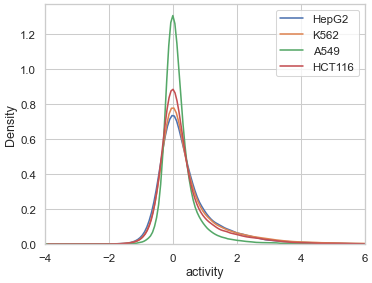

In [28]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
for cell_type in cell_types:
    y = df[cell_type]
    sns.kdeplot(y, label=cell_type)
plt.xlim(-4, 6)
plt.xlabel('activity')
plt.legend()
plt.savefig(f'figures/activity_kde.png', dpi=200)
plt.show()

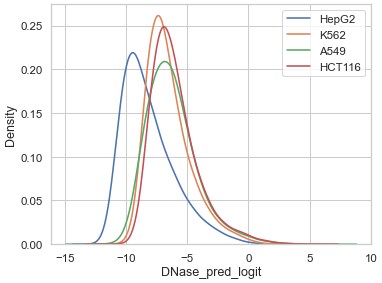

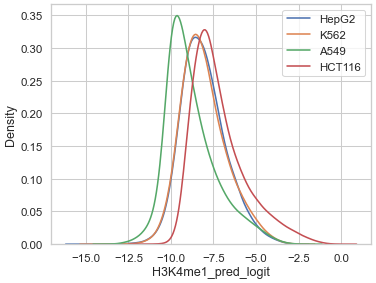

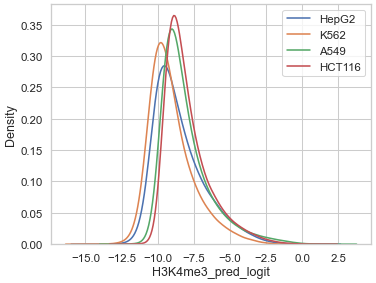

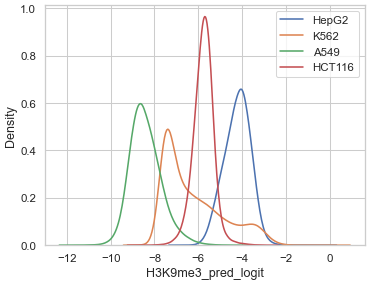

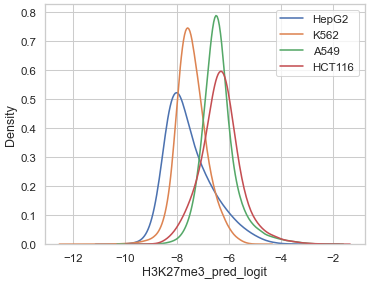

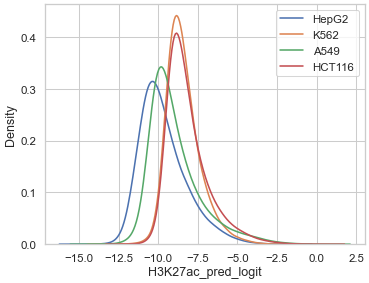

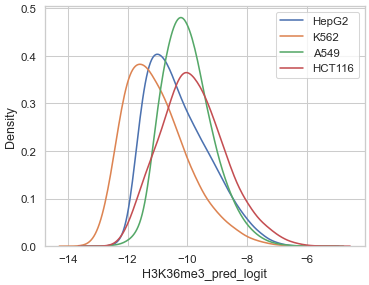

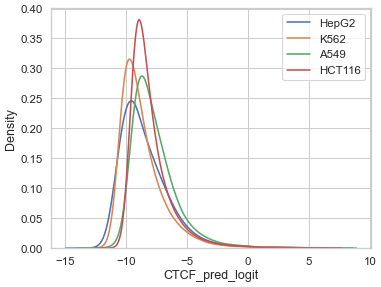

In [59]:
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = df[f'{cell_type}_{assay}_pred_logit'].copy()
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlabel(f'{assay}_pred_logit')
    plt.legend()
    plt.savefig(f'figures/{assay}_pred_logit_kde.png', dpi=200)
    plt.show()

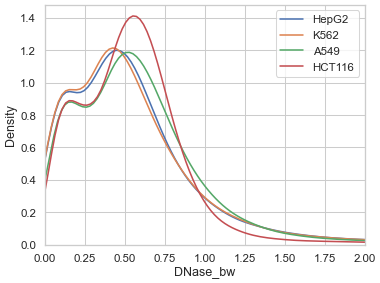

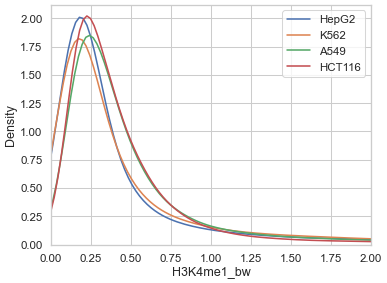

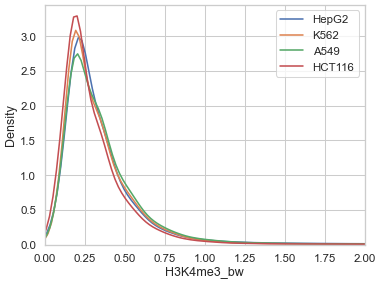

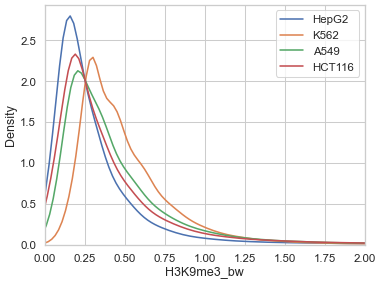

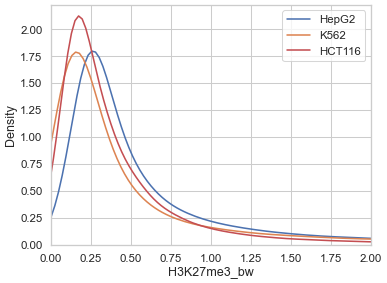

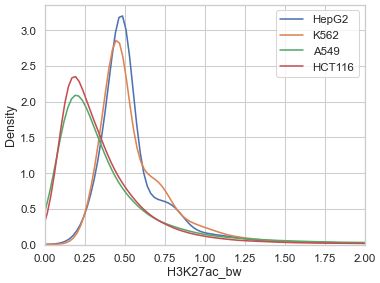

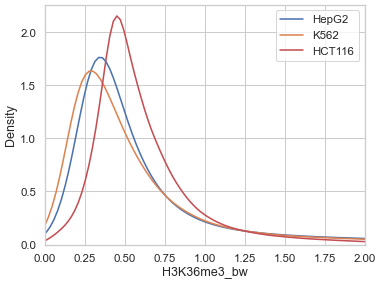

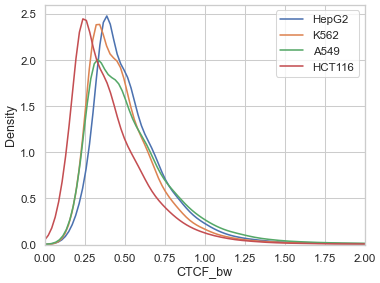

In [29]:
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = df[f'{cell_type}_{assay}_pval'].copy()
        x = x[x<4]
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
        plt.xlim(0, 2)
    plt.xlabel(f'{assay}_pval')
    plt.legend()
    plt.savefig(f'figures/{assay}_pval_kde.png', dpi=200)
    plt.show()

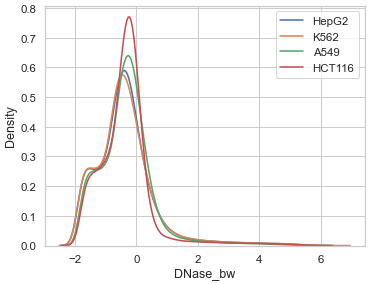

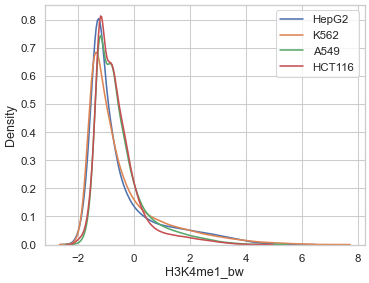

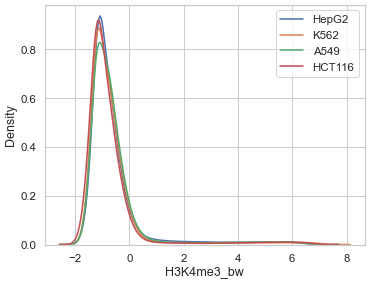

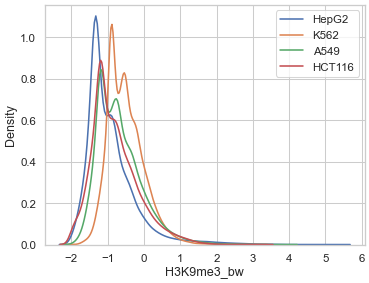

/tmp/ipykernel_98997/2987991804.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type, bw_adjust=2)


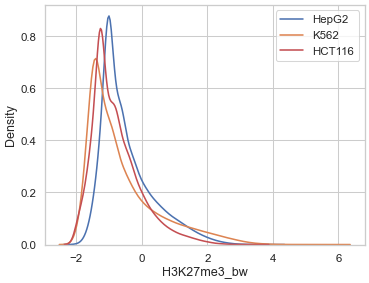

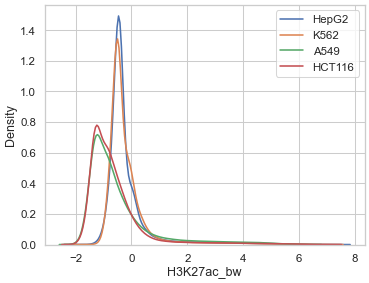

/tmp/ipykernel_98997/2987991804.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type, bw_adjust=2)


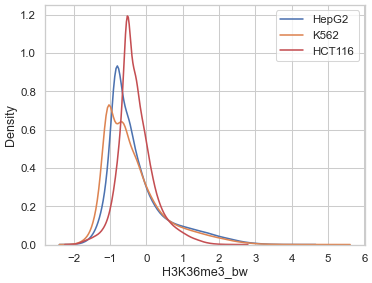

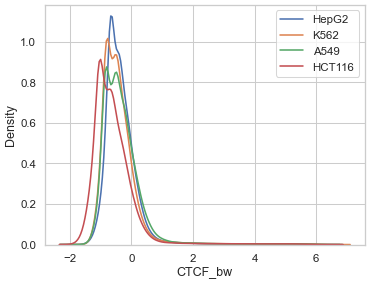

In [31]:
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = df[f'{cell_type}_{assay}_pval'].copy()
        x = np.log2(x + 0.25)
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
        # plt.xlim(0, 2)
    plt.xlabel(f'{assay}_pval')
    plt.legend()
    plt.savefig(f'figures/{assay}_pval_kde.png', dpi=200)
    plt.show()

In [20]:
main_df = df.copy()

data_split_dict = {}
data_split_dict['total'] = np.ones(len(main_df), dtype=bool)
data_split_dict['chrom'] = main_df['chr'].isin([f'chr{i}' for i in range(1, 23)])
data_split_dict['train'] = main_df['chr'].isin([f'chr{i}' for i in range(3, 23)])
data_split_dict['valid'] = main_df['chr'].isin(['chr1'])
data_split_dict['test'] = main_df['chr'].isin(['chr2'])
data_split_dict['designed'] = main_df['chr'].isin(['chr0'])


cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
main_df['diff'] = (main_df[cell_types].max(axis=1) - main_df[cell_types].min(axis=1)) > 1
data_split_dict['const'] = ~main_df['diff']
data_split_dict['diff']  = main_df['diff']

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

In [17]:
condition = data_split_dict['diff']
df = df[condition]

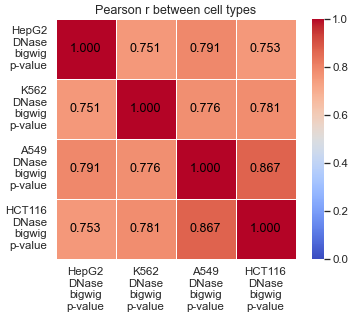

In [21]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[f'{cell_types[i]}_DNase_pval']
        y = df[f'{cell_types[j]}_DNase_pval']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\nbigwig\np-value' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\nbigwig\np-value' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Pearson_DNase_pval.png', dpi=200, bbox_inches='tight')
plt.show()

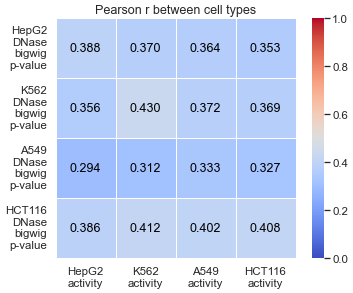

In [30]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[cell_types[i]]
        y = df[f'{cell_types[j]}_DNase_pval']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)


plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=cell_types, rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}_DNase_pval' for cell_type in cell_types], rotation=0)

plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nactivity' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\nbigwig\np-value' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Pearson_DNase_pval_vs_activity.png', dpi=200, bbox_inches='tight')
plt.show()

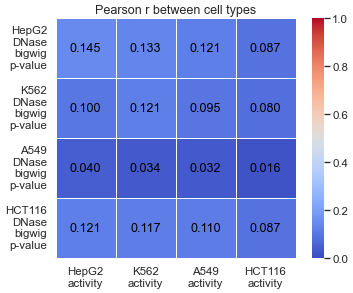

In [31]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[cell_types[i]]
        y = df[f'{cell_types[j]}_DNase_pval']
        # corr_matrix[i][j] = pearson(x, y)
        corr_matrix[i][j] = spearman(x, y)


plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=cell_types, rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}_DNase_pval' for cell_type in cell_types], rotation=0)

plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nactivity' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\nbigwig\np-value' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Spearman_DNase_pval_vs_activity.png', dpi=200, bbox_inches='tight')
plt.show()

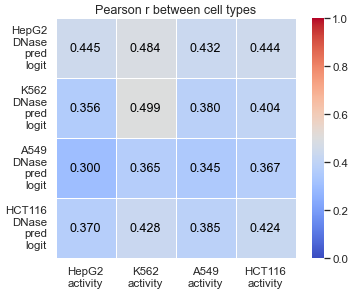

In [28]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[cell_types[i]]
        y = df[f'{cell_types[j]}_DNase_pred_logit']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nactivity' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\npred\nlogit' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Pearson_DNase_pred_vs_activity.png', dpi=200, bbox_inches='tight')
plt.show()

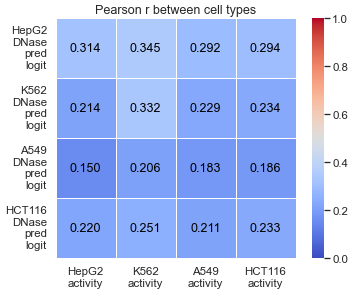

In [29]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[cell_types[i]]
        y = df[f'{cell_types[j]}_DNase_pred_logit']
        # corr_matrix[i][j] = pearson(x, y)
        corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nactivity' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\npred\nlogit' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Spearman_DNase_pred_vs_activity.png', dpi=200, bbox_inches='tight')
plt.show()

In [19]:
def find_bigwig_file(metadata_df, cell_type, assay, data_dir):
    if assay == 'DNase':
        accession = metadata_df[(metadata_df['Biosample term name'] == cell_type) & (metadata_df['Assay name'] == 'DNase-seq')]['Accession']
    else:
        accession = metadata_df[(metadata_df['Biosample term name'] == cell_type) & (metadata_df['Target of assay'] == assay)]['Accession']

    if len(accession) != 1:
        print(f'Error: {cell_type} {assay} metadata not found')
        return None
    
    accession = accession.values[0]
    files = os.listdir(f'{data_dir}/{accession}')
    # print(f'Accession {accession_id} has {len(files)} file.')
    if len(files) != 1:
        return None
    file = files[0]
    path = f'{data_dir}/{accession}/{file}'
    return path

In [21]:
metadata_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/ENCODE/metadata.csv')
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

for cell_type in cell_types:
    for assay in assays:
        f = find_bigwig_file(metadata_df, cell_type, assay, data_dir='/home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads')
        print(cell_type, assay, f)

HepG2 DNase None
HepG2 H3K4me1 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000APV/ENCFF576YVM.bigWig
HepG2 H3K4me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AMP/ENCFF284FVP.bigWig
HepG2 H3K9me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000ATD/ENCFF754ROM.bigWig
HepG2 H3K27me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AOL/ENCFF529HLC.bigWig
HepG2 H3K27ac /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AMO/ENCFF022TZG.bigWig
HepG2 H3K36me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AMB/ENCFF247LOP.bigWig
HepG2 CTCF /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AMA/ENCFF357NFO.bigWig
K562 DNase None
K562 H3K4me1 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AKS/ENCFF607SUJ.bigWig
K562 H3K4me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AKU/ENCFF660WUG.bigWig
K562 H3K9me3 /home/hxcai/cell_type_specific_CRE/data

In [ ]:
import pyBigWig
import numpy as np
from tqdm import tqdm

def extract_bigwig_signal(df, bigwig_file, window_size=200):
    """
    Extracts mean signal values from a BigWig file for regions centered on 
    positions specified in the DataFrame.

    Parameters:
    df : DataFrame
        A DataFrame containing chromosome ('chr') and position ('hg38_pos') columns.
    bigwig_file : str
        Path to the BigWig file.
    window_size : int, optional
        Half of the window size around the position (default is 100).

    Returns:
    np.ndarray
        An array of mean signal values for each position in the DataFrame.
    """
    mean_signal_values = []
    bw_reader = pyBigWig.open(bigwig_file)
    
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        chromosome = row['chr']
        position = row['hg38_pos']
        start, end = position - window_size//2, position + window_size//2
        
        try:
            signal_values = bw_reader.values(chromosome, start, end)
            mean_signal_values.append(np.mean(signal_values))
        except RuntimeError:
            mean_signal_values.append(np.nan)
    
    bw_reader.close()

    mean_signal_values = np.array(mean_signal_values)
    return mean_signal_values

In [ ]:
MPRA_df = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k.csv')

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        bigwig_file = find_bigwig_file(metadata_df, cell_type, assay)
        print(cell_type, assay, bigwig_file)
        if bigwig_file is not None:
            mean_signal_values = extract_bigwig_signal(MPRA_df, bigwig_file)
            MPRA_df[f'{cell_type}_{assay}_fold'] = mean_signal_values

        else:
            print(f"{cell_type}_{assay} does not have bigwig data")
            MPRA_df[f'{cell_type}_{assay}_fold'] = np.nan

MPRA_df.to_csv('../../data/SirajMPRA/SirajMPRA_281k_fold.csv', index=False)

In [30]:
df_fold = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_fold.csv')
df_pred = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_pred.csv')
df = pd.concat([df_fold, df_pred], axis=1)
df = df.loc[:, ~df.columns.duplicated()]
df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit,flag
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789,True
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042,True
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061,True
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-9.422236,-7.347300,-8.694691,-9.359782,-5.428939,-6.522037,-9.115440,-11.068689,-9.575661,True
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-8.141296,-6.796749,-8.496226,-8.733803,-5.545477,-6.327884,-9.130206,-9.962906,-8.654516,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-6.511399,-6.431361,-7.430185,-8.173793,-5.671370,-6.129188,-8.043088,-9.617792,-7.009111,True
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.056848,-0.772791,-4.967724,-5.641770,-6.566808,-6.260857,-6.482600,-8.868452,-0.263586,True
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-5.489334,-4.034711,-4.979386,-6.015636,-6.284647,-6.169166,-6.730436,-8.404432,-6.365997,True
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767,True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


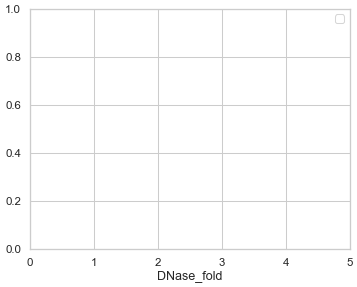

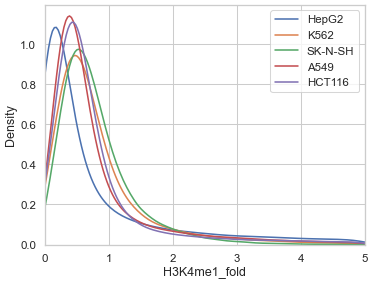

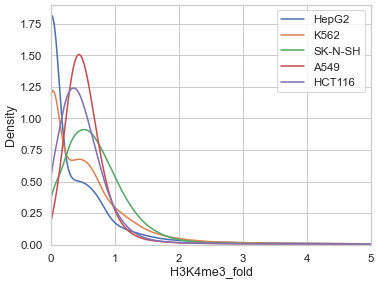

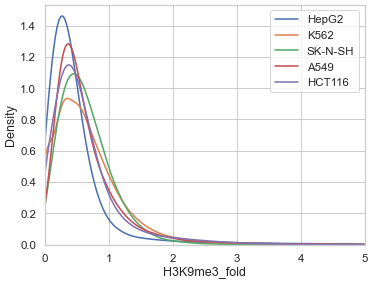

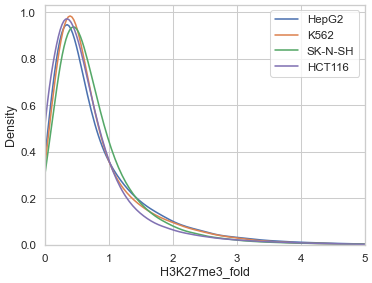

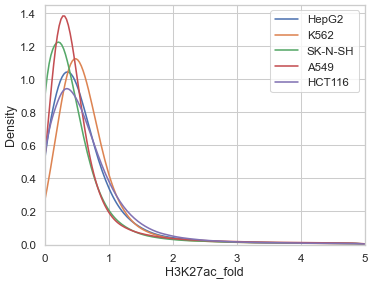

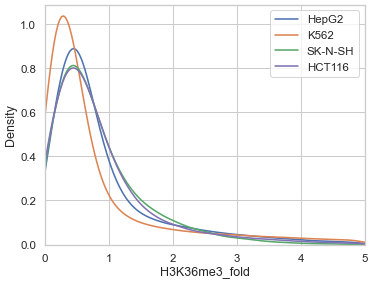

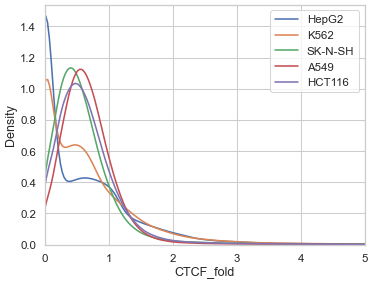

In [33]:
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        if f'{cell_type}_{assay}_fold' in df.columns:
            x = df[f'{cell_type}_{assay}_fold'].copy()
            x = x[x < 5]
            sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlim(0, 5)
    plt.xlabel(f'{assay}_fold')
    plt.legend()
    plt.savefig(f'figures/kde/{assay}_fold.png', dpi=200)
    plt.show()